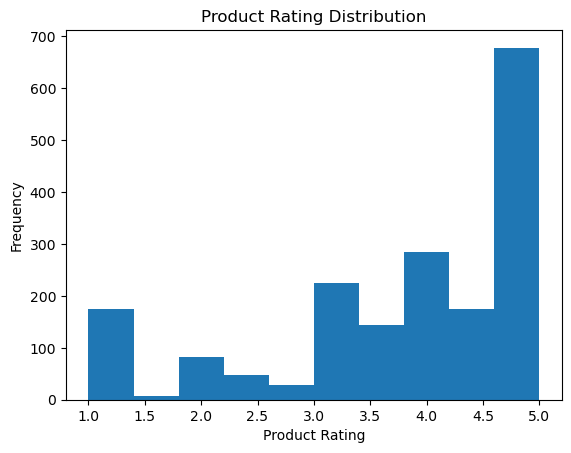

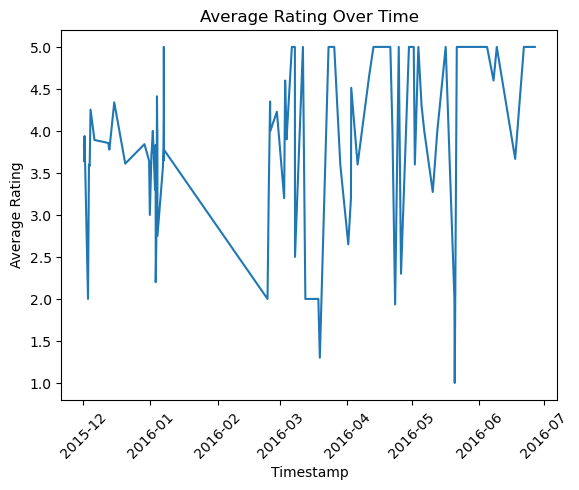

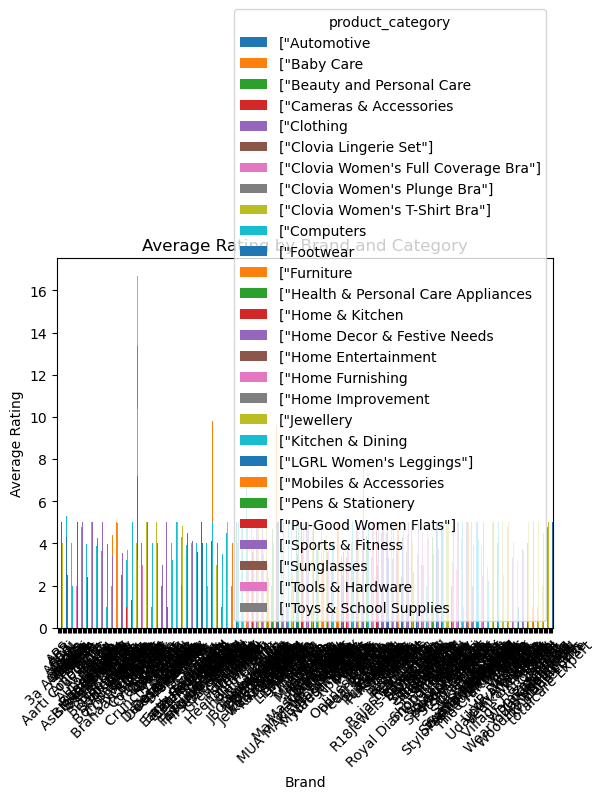

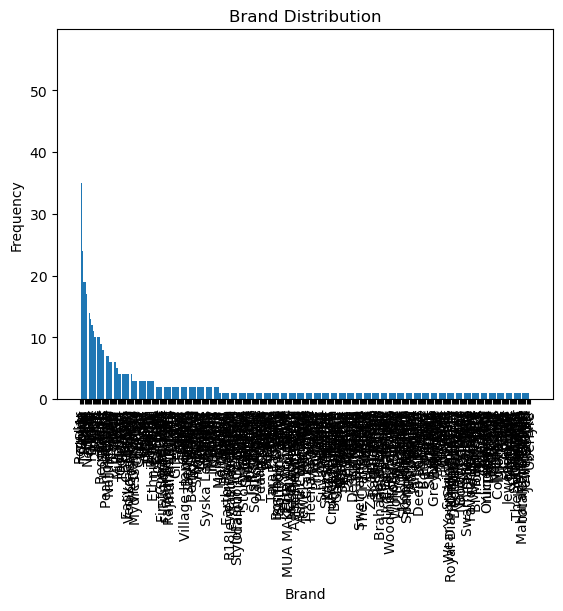

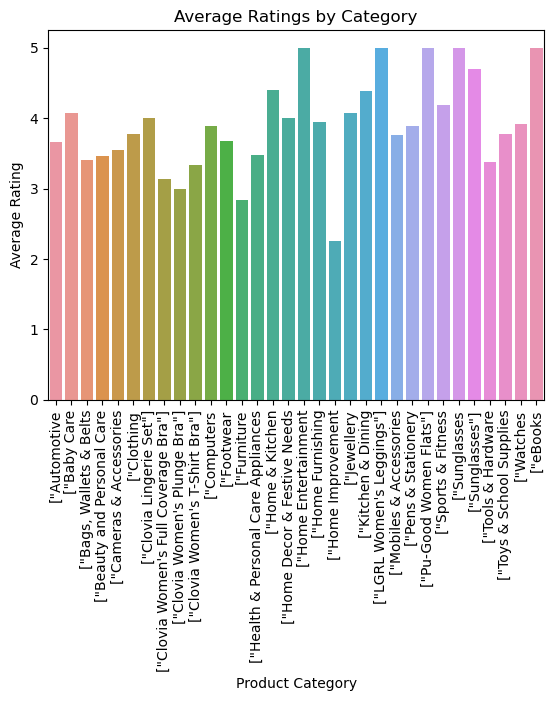

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('flipkart_com-ecommerce_sample.csv')

# Select the desired columns for analysis
selected_columns = ['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree',
                    'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product',
                    'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications']

# Subset the DataFrame with selected columns
df_selected = df[selected_columns]

# Perform data cleaning and preprocessing
# Drop rows with missing values or string ratings
df_selected = df_selected.dropna(subset=['product_rating'])
df_selected = df_selected[df_selected['product_rating'] != 'No rating available']

# Convert 'product_rating' column to float
df_selected['product_rating'] = df_selected['product_rating'].astype(float)

# Histogram of product ratings
plt.hist(df_selected['product_rating'], bins=10)
plt.xlabel('Product Rating')
plt.ylabel('Frequency')
plt.title('Product Rating Distribution')
plt.show()

# Line plot of ratings over time
df_selected['crawl_timestamp'] = pd.to_datetime(df_selected['crawl_timestamp'])
ratings_over_time = df_selected.groupby('crawl_timestamp')['product_rating'].mean().reset_index()
plt.plot(ratings_over_time['crawl_timestamp'], ratings_over_time['product_rating'])
plt.xlabel('Timestamp')
plt.ylabel('Average Rating')
plt.title('Average Rating Over Time')
plt.xticks(rotation=45)
plt.show()

# Clustered bar chart of ratings by brand and category
df_selected['product_category'] = df_selected['product_category_tree'].apply(lambda x: x.split('>>')[0].strip())
brand_category_ratings = df_selected.groupby(['brand', 'product_category'])['product_rating'].mean().reset_index()
pivot_table = brand_category_ratings.pivot(index='brand', columns='product_category', values='product_rating')
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Average Rating by Brand and Category')
plt.xticks(rotation=45)
plt.show()

# Bar chart of brand distribution
brand_distribution = df_selected['brand'].value_counts()
plt.bar(brand_distribution.index, brand_distribution.values)
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Brand Distribution')
plt.xticks(rotation=90)
plt.show()

# Bar chart of average ratings by category
avg_ratings = df_selected.groupby('product_category')['product_rating'].mean().reset_index()
sns.barplot(x='product_category', y='product_rating', data=avg_ratings)
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Category')
plt.xticks(rotation=90)
plt.show()

# Add more code to generate additional charts for analysis using the available columns
